# Import

In [1]:
import numpy as np
import random
from scipy.stats import spearmanr, pearsonr
from scipy.optimize import fsolve
from numpy.linalg import inv

#import the custom functions
import MFunctions as mf

In [2]:
#Load verb_symilarity from which we extract the pairs
simdict = mf.verb_similarity("SimVerb-3500.txt")

## 13 obs defs

In [3]:
# Make observables object
set1 = mf.observables(["Linear.txt","Quadratic.txt"])
# Load matrices and make vector dictionaries
objsubset1 = mf.vector_dictionary("matrices_1160_arg_obj_context_subj.txt",set1)
subobjset1 = mf.vector_dictionary("matrices_1160_arg_subj_context_obj.txt",set1,[0])
obj08sub02set1 = mf.vector_dictionary([["matrices_1160_arg_obj_context_subj.txt","matrices_1160_arg_subj_context_obj.txt"],[0.8,0.2]],set1,[1])
obj09sub01set1 = mf.vector_dictionary([["matrices_1160_arg_obj_context_subj.txt","matrices_1160_arg_subj_context_obj.txt"],[0.9,0.1]],set1,[1])

file_list1 = [objsubset1,obj09sub01set1,obj08sub02set1,subobjset1]

In [14]:
np.cov(np.stack((objsubset1['abandon'].val,objsubset1['absorb'].val),axis=0))

array([[60.28871298, 32.16347361],
       [32.16347361, 29.70597468]])

In [24]:
len(np.cov(np.array([a.val for a in objsubset1.values()]).T))
objsubset1['abandon'].val @ inv(np.cov(np.array([a.val for a in objsubset1.values()]).T)) @ objsubset1['absorb'].val

1.58818655781893

In [4]:
mf.M_vec_mult_dev_Maha(objsubset1['abandon'].val,objsubset1['absorb'].val,objsubset1.mean,objsubset1.inv_cov)

0.09039445386550615

In [5]:
(objsubset1['abandon'].val - objsubset1.mean) @ objsubset1.inv_cov @ (objsubset1['absorb'].val - objsubset1.mean)

0.09039445386550615

In [34]:
(objsubset1['abandon'].val - objsubset1.mean).T @ objsubset1.inv_cov @ (objsubset1['absorb'].val - objsubset1.mean)

0.09039445386550615

In [39]:
print(inv(objsubset1.inv_cov))
objsubset1.std ** 2

[[ 1.47339080e-01  3.58018914e-01 -2.97635092e+00 -5.36815233e-02
  -2.21398926e-02 -2.39046738e-02 -3.84907773e+00 -2.39765263e+00
  -4.67976021e-02 -4.52308735e+00 -3.33534448e-02 -1.35133718e-01
  -5.47420287e-01]
 [ 3.58018914e-01  1.29972682e+01 -2.49858947e+01 -4.46673592e-01
  -1.86131271e-01 -2.36380979e-01 -3.37653109e+01 -2.28184170e+01
  -1.08698913e+00 -9.90170393e+01 -2.70922739e-01 -3.87845999e-01
  -6.73816859e+00]
 [-2.97635092e+00 -2.49858947e+01  2.91446847e+02  4.25898715e+00
   1.88225185e+00  2.64307209e+00  3.35766832e+02  2.62545223e+02
   4.61887286e+00  3.82035746e+02  3.19414188e+00  3.98973571e+00
   1.98954118e+01]
 [-5.36815233e-02 -4.46673592e-01  4.25898715e+00  1.43515307e-01
   3.50708883e-02  2.86653142e-02  5.18274175e+00  3.81975121e+00
   1.74991607e-01  5.63247591e+00  4.80303609e-02  7.13026361e-02
   3.51519475e-01]
 [-2.21398926e-02 -1.86131271e-01  1.88225185e+00  3.50708883e-02
   7.30163936e-02  1.73985450e-02  2.52915275e+00  1.56210248e+00


array([1.47212064e-01, 1.29860637e+01, 2.91195600e+02, 1.43391587e-01,
       7.29534484e-02, 6.32929446e-02, 5.01670093e+02, 2.58178458e+02,
       4.48072384e+00, 1.59729082e+03, 3.57867376e-02, 2.01625798e-01,
       8.63891584e+00])

In [32]:
print(mf.averaged_product(simdict,'ANTONYMS',objsubset1,'maha'))
print(mf.averaged_product(simdict,'NONE',objsubset1,'maha'))
print(mf.averaged_product(simdict,'SYNONYMS',objsubset1,'maha'))

[0.053876079937608595, 0.3044157992509545]
[0.09409812865040305, 0.34223133458929456]
[0.16551755788424274, 0.3613969681045333]


In [33]:
print(mf.averaged_product(simdict,'HYPER/HYPONYMS',objsubset1,'maha'))
print(mf.averaged_product(simdict,'COHYPONYMS',objsubset1,'maha'))

[0.07886372954108004, 0.32224339811536057]
[0.08193683642646281, 0.34307863869139615]


In [47]:
print(np.array([objsubset1.mean,subobjset1.mean]).T)

[[-2.14625384e-01 -1.84904324e-02]
 [-1.60455892e+00  1.49126287e+00]
 [ 1.32395473e+01  2.13274947e+01]
 [ 1.87671268e-01  1.44855555e-01]
 [ 8.47026225e-02  1.85585767e-01]
 [ 9.74328070e-02  2.43866839e-01]
 [ 1.56561183e+01  2.14635736e+01]
 [ 1.12320081e+01  2.39400527e+01]
 [ 2.66275448e-01  7.02412394e-01]
 [ 1.55606730e+01  3.25449030e+01]
 [ 1.40956302e-01  2.18269921e-01]
 [ 1.93276119e-01  1.72820286e-01]
 [ 7.02089351e-01  1.47372765e-01]]


In [48]:
print(np.array([objsubset2.mean,subobjset2.mean]).T)

[[-3.29472649e-03  4.87359019e-03]
 [-1.00753392e-02  1.22413685e-01]
 [-1.18238871e-02 -1.21771457e-02]
 [-1.76408749e-02  4.85183686e-01]
 [-6.97634569e-01  8.46264052e-01]
 [-1.03906730e-01  3.19831771e-01]
 [-7.85890355e+00  2.10249098e+00]
 [-1.23899696e+02  5.37596780e+02]
 [ 8.25608571e+01  2.22599355e+02]
 [ 1.83942536e+03  1.77309156e+04]]


## 15 obs defs

In [10]:
# Make observables object
set2 = mf.observables(["Cubic1.txt","Quartic1.txt","Additional1.txt"])
# Load matrices and make vector dictionaries
objsubset2 = mf.vector_dictionary("matrices_1160_arg_obj_context_subj.txt",set2)
subobjset2 = mf.vector_dictionary("matrices_1160_arg_subj_context_obj.txt",set2,[0])
obj08sub02set2 = mf.vector_dictionary([["matrices_1160_arg_obj_context_subj.txt","matrices_1160_arg_subj_context_obj.txt"],[0.8,0.2]],set2,[1])
obj09sub01set2 = mf.vector_dictionary([["matrices_1160_arg_obj_context_subj.txt","matrices_1160_arg_subj_context_obj.txt"],[0.9,0.1]],set2,[1])

file_list2 = [objsubset2,obj09sub01set2,obj08sub02set2,subobjset2]

## 28 obs defs

In [3]:
# Make observables object
set3 = mf.observables(["Linear.txt","Quadratic.txt","Cubic1.txt","Quartic1.txt","Additional1.txt"])
# Load matrices and make vector dictionaries
objsubset3 = mf.vector_dictionary("matrices_1160_arg_obj_context_subj.txt",set3)
subobjset3 = mf.vector_dictionary("matrices_1160_arg_subj_context_obj.txt",set3,[0])
obj08sub02set3 = mf.vector_dictionary([["matrices_1160_arg_obj_context_subj.txt","matrices_1160_arg_subj_context_obj.txt"],[0.8,0.2]],set3,[1])
obj09sub01set3 = mf.vector_dictionary([["matrices_1160_arg_obj_context_subj.txt","matrices_1160_arg_subj_context_obj.txt"],[0.9,0.1]],set3,[1])

file_list3 = [objsubset3,obj09sub01set3,obj08sub02set3,subobjset3]

# Define some functions for the precision computation

## Here the precision is computed by averaging

In [ ]:
# We decided to compute the precision by averaging over the precision in each category, which scales well
# for cases where the sample sizes are very different for syn/non/ant (we have ~300 syn ~100 ant ~2000 none)

In [53]:
def synvsant1(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'SYNONYMS',file_name,"maha")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,'ANTONYMS',file_name,"maha")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + ant1[1]/syn1[1] * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"maha")

    prodlist5 = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"maha")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the average precision
    precision1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #return [ant1,divide1,syn1,antcomparison1.count(True)/len(antcomparison1),syncomparison1.count(True)/len(syncomparison1),precision1]
    return precision1

In [35]:
def synvsnonevsant1(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'SYNONYMS',file_name,"maha")
    
    #Compute the mean and the standard deviation for the NONE
    non1 = mf.averaged_product(simdict,'NONE',file_name,"maha")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,'ANTONYMS',file_name,"maha")

    #Use the means and deviations to set the divide between synonyms and none
    divide1 = non1[0] + non1[1]/syn1[1] * (syn1[0]-non1[0])/2

    #Use the means and deviations to set the divide between none and antonyms
    divide5 = ant1[0] + ant1[1]/non1[1] * (non1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"maha")

    prodlist5 = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"maha")

    prodlist9 = mf.averaged_product_list(simdict,'NONE',file_name,"maha")

    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of none we get right
    noncomparison1 = [a > divide5 and a < divide1 for a in list(prodlist9.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide5 for a in list(prodlist5.values())]

    #Compute the average precision
    precision1 = 1/3*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1) + noncomparison1.count(True)/len(noncomparison1))

    return precision1

In [36]:
def synvsant2(file_name,myseed1,myseed2,samplesize1,samplesize2):
    #Since here we use just a subset of the pairs of synonyms and antonyms to determine the means and deviation, we have to do this by hand

    #Compute the products for all the observable deviation vectors associated to the SYNONYMS pairs
    all1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"maha")

    #The subset from which we copute the means is randomly selected, we seed the random generator for repeatable results. Chosen seed 7
    random.seed(myseed1)

    mysample = random.sample(list(all1),samplesize1)

    #Find complementary sample where we will predict and test
    mycomplsample = set(all1.keys()) - set(mysample)

    #Compute the means and standard deviations
    syn1 = [np.mean(np.array(list(map(all1.get,mysample)))),np.std(np.array(list(map(all1.get,mysample))))]

    #Now the same thing for the antonyms

    #Compute the products for all the observable deviation vectors associated to the SYNONYMS pairs
    all5 = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"maha")

    #The subset from which we copute the means is randomly selected, we seed the random generator for repeatable results. Chosen seed 13
    #random.seed(117) #Interesting values come out for this seed
    random.seed(myseed2)

    mysample2 = random.sample(list(all5),samplesize2)

    #Find complementary sample where we will predict and test
    mycomplsample2 = set(all5.keys()) - set(mysample2)

    #Compute the means and standard deviations
    ant1 = [np.mean(np.array(list(map(all5.get,mysample2)))),np.std(np.array(list(map(all5.get,mysample2))))]

    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + ant1[1]/syn1[1] * (syn1[0]-ant1[0])/2
    
    # Next we test on the complementary sample
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(map(all1.get,mycomplsample))]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(map(all5.get,mycomplsample2))]

    #Compute the average precision
    precision1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))

    return precision1

In [72]:
def synvsnonevsant2(file_name,myseed1,myseed2,myseed3,samplesize1,samplesize2,samplesize3):
    
    #Since here we use just a subset of the pairs of synonyms and antonyms to determine the means and deviation, we have to do this by hand

    #Compute the products for all the observable deviation vectors associated to the SYNONYMS pairs
    all1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"maha")

    #The subset from which we copute the means is randomly selected, we seed the random generator for repeatable results. Chosen seed 7
    random.seed(myseed1)

    mysample = random.sample(list(all1),samplesize1)

    #Find complementary sample where we will predict and test
    mycomplsample = set(all1.keys()) - set(mysample)

    #Compute the means and standard deviations
    syn1 = [np.mean(np.array(list(map(all1.get,mysample)))),np.std(np.array(list(map(all1.get,mysample))))]

    #Now the same thing for the antonyms

    #Compute the products for all the observable deviation vectors associated to the SYNONYMS pairs
    all5 = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"maha")
    
    #The subset from which we copute the means is randomly selected, we seed the random generator for repeatable results. Chosen seed 13
    random.seed(myseed2)

    mysample2 = random.sample(list(all5),samplesize2)

    #Find complementary sample where we will predict and test
    mycomplsample2 = set(all5.keys()) - set(mysample2)

    #Compute the means and standard deviations
    ant1 = [np.mean(np.array(list(map(all5.get,mysample2)))),np.std(np.array(list(map(all5.get,mysample2))))]
    
    #Finally the same for None

    #Compute the products for all the observable deviation vectors associated to the SYNONYMS pairs
    all9 = mf.averaged_product_list(simdict,'NONE',file_name,"maha")
    
    #The subset from which we copute the means is randomly selected, we seed the random generator for repeatable results. Chosen seed 13
    random.seed(myseed3)

    mysample3 = random.sample(list(all9),samplesize3)

    #Find complementary sample where we will predict and test
    mycomplsample3 = set(all9.keys()) - set(mysample3)

    #Compute the means and standard deviations
    non1 = [np.mean(np.array(list(map(all9.get,mysample3)))),np.std(np.array(list(map(all9.get,mysample3))))]
    
    #Use the means and deviations to set the divide between synonyms and none
    divide1 = non1[0] + non1[1]/syn1[1] * (syn1[0]-non1[0])/2

    #Use the means and deviations to set the divide between none and antonyms
    divide5 = ant1[0] + ant1[1]/non1[1] * (non1[0]-ant1[0])/2
    
    # Next we test on the complementary sample
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(map(all1.get,mycomplsample))]


    # Compare and count the number of none we get right
    noncomparison1 = [a > divide5 and a < divide1 for a in list(map(all9.get,mycomplsample3))]
    
    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide5 for a in list(map(all5.get,mycomplsample2))]
    
    #Compute the average precision
    precision1 = 1/3*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1) + noncomparison1.count(True)/len(noncomparison1))
    
    # return precision1
    return [ant1[0],divide5,non1[0],divide1,syn1[0],antcomparison1.count(True)/len(antcomparison1),noncomparison1.count(True)/len(noncomparison1),syncomparison1.count(True)/len(syncomparison1),precision1]

In [38]:
def hypohyper1(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'COHYPONYMS',file_name,"maha")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,'HYPER/HYPONYMS',file_name,"maha")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + ant1[1]/syn1[1] * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'COHYPONYMS',file_name,"maha")

    prodlist5 = mf.averaged_product_list(simdict,'HYPER/HYPONYMS',file_name,"maha")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the average precision
    precision1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    return precision1

In [39]:
def hypohyper2(file_name,myseed1,myseed2,samplesize1,samplesize2):
    #Since here we use just a subset of the pairs of synonyms and antonyms to determine the means and deviation, we have to do this by hand

    #Compute the products for all the observable deviation vectors associated to the SYNONYMS pairs
    all1 = mf.averaged_product_list(simdict,'COHYPONYMS',file_name,"maha")

    #The subset from which we copute the means is randomly selected, we seed the random generator for repeatable results. Chosen seed 7
    random.seed(myseed1)

    mysample = random.sample(list(all1),samplesize1)

    #Find complementary sample where we will predict and test
    mycomplsample = set(all1.keys()) - set(mysample)

    #Compute the means and standard deviations
    syn1 = [np.mean(np.array(list(map(all1.get,mysample)))),np.std(np.array(list(map(all1.get,mysample))))]

    #Now the same thing for the antonyms

    #Compute the products for all the observable deviation vectors associated to the SYNONYMS pairs
    all5 = mf.averaged_product_list(simdict,'HYPER/HYPONYMS',file_name,"maha")

    #The subset from which we copute the means is randomly selected, we seed the random generator for repeatable results. Chosen seed 13
    #random.seed(117) #Interesting values come out for this seed
    random.seed(myseed2)

    mysample2 = random.sample(list(all5),samplesize2)

    #Find complementary sample where we will predict and test
    mycomplsample2 = set(all5.keys()) - set(mysample2)

    #Compute the means and standard deviations
    ant1 = [np.mean(np.array(list(map(all5.get,mysample2)))),np.std(np.array(list(map(all5.get,mysample2))))]

    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + ant1[1]/syn1[1] * (syn1[0]-ant1[0])/2
    
    # Next we test on the complementary sample
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(map(all1.get,mycomplsample))]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(map(all5.get,mycomplsample2))]

    #Compute the average precision
    precision1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))

    return precision1

In [40]:
def synvsnone2(file_name,myseed1,myseed2,samplesize1,samplesize2):
    #Since here we use just a subset of the pairs of synonyms and antonyms to determine the means and deviation, we have to do this by hand

    #Compute the products for all the observable deviation vectors associated to the SYNONYMS pairs
    all1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"maha")

    #The subset from which we copute the means is randomly selected, we seed the random generator for repeatable results. Chosen seed 7
    random.seed(myseed1)

    mysample = random.sample(list(all1),samplesize1)

    #Find complementary sample where we will predict and test
    mycomplsample = set(all1.keys()) - set(mysample)

    #Compute the means and standard deviations
    syn1 = [np.mean(np.array(list(map(all1.get,mysample)))),np.std(np.array(list(map(all1.get,mysample))))]

    #Now the same thing for the antonyms

    #Compute the products for all the observable deviation vectors associated to the SYNONYMS pairs
    all5 = mf.averaged_product_list(simdict,'NONE',file_name,"maha")

    #The subset from which we copute the means is randomly selected, we seed the random generator for repeatable results. Chosen seed 13
    #random.seed(117) #Interesting values come out for this seed
    random.seed(myseed2)

    mysample2 = random.sample(list(all5),samplesize2)

    #Find complementary sample where we will predict and test
    mycomplsample2 = set(all5.keys()) - set(mysample2)

    #Compute the means and standard deviations
    ant1 = [np.mean(np.array(list(map(all5.get,mysample2)))),np.std(np.array(list(map(all5.get,mysample2))))]

    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + ant1[1]/syn1[1] * (syn1[0]-ant1[0])/2
    
    # Next we test on the complementary sample
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(map(all1.get,mycomplsample))]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(map(all5.get,mycomplsample2))]

    #Compute the average precision
    precision1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))

    return precision1

## Choosing the seeds for the various samples

In [41]:
#Experiment 2 requires averaging over a number of different random samples. To generate these in a way 
#which is random but repeatable we need a list of seeds for the random generator. We decided to pick 20 samples

#seed the random generator before genearting the integer seeds for the random samples
random.seed(7)

seed_list = [(random.randint(0,5000),random.randint(0,5000)) for a in range(20)]

#Make a second seed_list for when we need 3 seeds instead of 2

seed_list2 = [(random.randint(0,5000),random.randint(0,5000),random.randint(0,5000)) for a in range(20)]

## Experiment 1 syn vs ant

In [54]:
# Experiment 1 synonym vs antonym
[synvsant1(a) for a in file_list1]

[0.5488871224165341, 0.550918565624448, 0.5717629394099982, 0.5419537184243066]

In [55]:
# Experiment 1 synonym vs antonym
[synvsant1(a) for a in file_list2]

[0.59066419360537, 0.578387210740152, 0.577945592651475, 0.5616057233704292]

In [56]:
# Experiment 1 synonym vs antonym
[synvsant1(a) for a in file_list3]

[0.5738827062356474,
 0.5763116057233705,
 0.5730436318671612,
 0.5342254018724607]

In [57]:
# Experiment 1 synonym vs antonym
[[synvsant1(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5488871224165341,
  0.550918565624448,
  0.5717629394099982,
  0.5419537184243066],
 [0.59066419360537, 0.578387210740152, 0.577945592651475, 0.5616057233704292],
 [0.5738827062356474,
  0.5763116057233705,
  0.5730436318671612,
  0.5342254018724607]]

## Experiment 1 hyper/hypo vs cohypo

In [28]:
# Experiment 1 synonym vs antonym
[hypohyper1(a) for a in file_list1]

[0.5248026315789474,
 0.5194078947368421,
 0.5286842105263159,
 0.5505921052631579]

In [29]:
# Experiment 1 synonym vs antonym
[hypohyper1(a) for a in file_list2]

[0.5328947368421053,
 0.5220065789473685,
 0.5242763157894736,
 0.5445065789473684]

In [30]:
# Experiment 1 synonym vs antonym
[hypohyper1(a) for a in file_list3]

[0.5319078947368421,
 0.5445394736842105,
 0.5438157894736843,
 0.5655921052631578]

In [16]:
# Experiment 1 synonym vs antonym
[[hypohyper1(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5132236842105263,
  0.5088486842105263,
  0.4820394736842105,
  0.5636842105263158],
 [0.52875, 0.506578947368421, 0.5158552631578948, 0.5407894736842105],
 [0.505296052631579,
  0.5084210526315789,
  0.4915131578947368,
  0.5615131578947369]]

## Experiment 1 syn vs ant vs none

In [31]:
# Experiment 1 synonym vs antonym
[synvsnonevsant1(a) for a in file_list1]

[0.3597136103529964,
 0.37129490582176006,
 0.3766332730527103,
 0.34676898871272266]

In [32]:
# Experiment 1 synonym vs antonym
[synvsnonevsant1(a) for a in file_list2]

[0.3824331906173338,
 0.3728928473173997,
 0.3738713700350529,
 0.37076496411534776]

In [33]:
# Experiment 1 synonym vs antonym
[synvsnonevsant1(a) for a in file_list3]

[0.3661160387503098,
 0.379667109846138,
 0.38460790123194216,
 0.37446110847645364]

In [17]:
# Experiment 1 synonym vs antonym
[[synvsnonevsant1(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.362264571983242,
  0.3771928950957084,
  0.3749326460323902,
  0.36194604992558954],
 [0.38264600285060635,
  0.3800901882743315,
  0.38659438787316025,
  0.39394446299817143],
 [0.38866247434022366,
  0.38778456937024713,
  0.3839317100186666,
  0.35708940440398235]]

## Experiment 2 syn vs ant

In [18]:
# Apply the function to every file with the given seed and average. The averaging is done using pure functions
# (lambda) so to compute all the precisions only once

# Synonyms vs Antonyms, sample size roughly 60%

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[synvsant2(myfile,*a,200,70) for myfile in localf] for a in seed_list ]) for localf in [file_list1,file_list2,file_list3]]

[array([[0.56039462, 0.04211602],
        [0.55438909, 0.03754836],
        [0.57546019, 0.0339747 ],
        [0.55407846, 0.03278038]]),
 array([[0.59781408, 0.02278781],
        [0.57735274, 0.0221987 ],
        [0.57314197, 0.03141434],
        [0.5909572 , 0.03444925]]),
 array([[0.58189715, 0.03141648],
        [0.56694087, 0.0402983 ],
        [0.57557524, 0.03220101],
        [0.54754372, 0.0310903 ]])]

In [19]:
# Synonyms vs Antonyms, sample size roughly 10%

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[synvsant2(myfile,*a,30,12) for myfile in localf] for a in seed_list ]) for localf in [file_list1,file_list2,file_list3]]

[array([[0.55086188, 0.01657804],
        [0.54678854, 0.01501592],
        [0.5612758 , 0.01352567],
        [0.54333553, 0.00854807]]),
 array([[0.58144214, 0.01616714],
        [0.57585639, 0.01522455],
        [0.56877745, 0.0202779 ],
        [0.58002855, 0.02859744]]),
 array([[0.56222552, 0.02460374],
        [0.56570872, 0.01985879],
        [0.56866491, 0.01886414],
        [0.52925176, 0.01844589]])]

In [20]:
# Synonyms vs Antonyms, sample size roughly 5%

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[synvsant2(myfile,*a,15,6) for myfile in localf] for a in seed_list ]) for localf in [file_list1,file_list2,file_list3]]

[array([[0.54801915, 0.02013617],
        [0.550135  , 0.01556084],
        [0.55373098, 0.01983714],
        [0.54293324, 0.00888518]]),
 array([[0.58119539, 0.01410614],
        [0.57701031, 0.01462597],
        [0.56819342, 0.02032706],
        [0.57875061, 0.02203886]]),
 array([[0.56154148, 0.02380756],
        [0.56003927, 0.02339533],
        [0.5647349 , 0.02219912],
        [0.5292538 , 0.01799333]])]

In [21]:
# Synonyms vs Antonyms, sample size 5 pairs

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[synvsant2(myfile,*a,5,5) for myfile in localf] for a in seed_list ]) for localf in [file_list1,file_list2,file_list3]]

[array([[0.55051401, 0.01899977],
        [0.552458  , 0.01669749],
        [0.55246584, 0.01546005],
        [0.54310945, 0.00816041]]),
 array([[0.58383768, 0.01408844],
        [0.58094402, 0.01610168],
        [0.57362957, 0.02069482],
        [0.57012396, 0.02647275]]),
 array([[0.56525967, 0.0255834 ],
        [0.56551354, 0.02744947],
        [0.56983248, 0.02410208],
        [0.52738121, 0.01509166]])]

## Experiment 2 hyper/hypo vs cohypo

In [22]:
# Apply the function to every file with the given seed and average. The averaging is done using pure functions
# (lambda) so to compute all the precisions only once

# Synonyms vs Antonyms, sample size roughly 60%

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[hypohyper2(myfile,*a,114,480) for myfile in localf] for a in seed_list ]) for localf in [file_list1,file_list2,file_list3]]

[array([[0.50793174, 0.02234349],
        [0.50521793, 0.02262847],
        [0.4870477 , 0.02302524],
        [0.55747533, 0.02644186]]),
 array([[0.52682977, 0.0242992 ],
        [0.50303043, 0.0244404 ],
        [0.51268914, 0.02369029],
        [0.5367722 , 0.02088753]]),
 array([[0.50441612, 0.02155842],
        [0.50317434, 0.02220255],
        [0.48428865, 0.02034857],
        [0.55805921, 0.01840522]])]

In [23]:
# Synonyms vs Antonyms, sample size roughly 10%

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[hypohyper2(myfile,*a,19,80) for myfile in localf] for a in seed_list ]) for localf in [file_list1,file_list2,file_list3]]

[array([[0.51436769, 0.00956718],
        [0.50892544, 0.00880911],
        [0.49367507, 0.01297031],
        [0.555053  , 0.01479079]]),
 array([[0.52674159, 0.00738598],
        [0.51149123, 0.00722114],
        [0.52113487, 0.00657384],
        [0.54543311, 0.00523753]]),
 array([[0.50940789, 0.0078246 ],
        [0.50592836, 0.00832209],
        [0.49157346, 0.00741353],
        [0.55757493, 0.01143995]])]

In [24]:
# Synonyms vs Antonyms, sample size roughly 5%

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[hypohyper2(myfile,*a,9,40) for myfile in localf] for a in seed_list ]) for localf in [file_list1,file_list2,file_list3]]

[array([[0.50974684, 0.00809215],
        [0.50254907, 0.00829142],
        [0.49278715, 0.00728339],
        [0.55290219, 0.01225013]]),
 array([[0.52272826, 0.00819252],
        [0.51180267, 0.00815317],
        [0.51583582, 0.00737087],
        [0.54437773, 0.00602248]]),
 array([[0.51014267, 0.01144102],
        [0.5066242 , 0.00968404],
        [0.49479082, 0.00613214],
        [0.55481281, 0.0156385 ]])]

In [25]:
# Synonyms vs Antonyms, sample size 5 pairs

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[hypohyper2(myfile,*a,5,5) for myfile in localf] for a in seed_list ]) for localf in [file_list1,file_list2,file_list3]]

[array([[0.5027588 , 0.00879799],
        [0.49899541, 0.00838378],
        [0.49609128, 0.00700579],
        [0.54790328, 0.01651937]]),
 array([[0.52072072, 0.01128593],
        [0.51204233, 0.00964568],
        [0.51400391, 0.01025887],
        [0.54842342, 0.00601392]]),
 array([[0.50646779, 0.01338825],
        [0.50287098, 0.0129764 ],
        [0.49756077, 0.00800256],
        [0.53885008, 0.01407308]])]

## Experiment 2 syn s none vs ant

In [73]:
# Synonyms vs Antonyms, sample size 60%

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[synvsnonevsant2(myfile,*a,200,70,1360) for myfile in localf] for a in seed_list2 ]) for localf in [file_list1,file_list2,file_list3]]

[array([[[0.05515074, 0.02271196],
         [0.05257014, 0.02255179],
         [0.05853657, 0.02177445],
         [0.07583014, 0.02374766]],
 
        [[0.07283321, 0.01426454],
         [0.07133429, 0.01435574],
         [0.07610355, 0.01403913],
         [0.08448803, 0.0143477 ]],
 
        [[0.09513961, 0.00514001],
         [0.09617704, 0.00508342],
         [0.09997741, 0.00515161],
         [0.0946444 , 0.00571741]],
 
        [[0.12801364, 0.00756876],
         [0.13199784, 0.00752662],
         [0.14060719, 0.00799578],
         [0.13329738, 0.00971583]],
 
        [[0.1641722 , 0.01451767],
         [0.16993587, 0.01418442],
         [0.1823157 , 0.01474107],
         [0.17377414, 0.01947911]],
 
        [[0.50609756, 0.06584237],
         [0.5097561 , 0.07747503],
         [0.50365854, 0.0736872 ],
         [0.56341463, 0.0751362 ]],
 
        [[0.05170532, 0.01579182],
         [0.06371078, 0.01832426],
         [0.06855389, 0.01684111],
         [0.04331514, 0.01646107]],
 

In [27]:
# Synonyms vs Antonyms, sample size 10%

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[synvsnonevsant2(myfile,*a,30,12,225) for myfile in localf] for a in seed_list2 ]) for localf in [file_list1,file_list2,file_list3]]

[array([[0.36645088, 0.01079191],
        [0.36755411, 0.01161776],
        [0.37265177, 0.00697   ],
        [0.35948244, 0.01137357]]),
 array([[0.38913295, 0.01520141],
        [0.38697205, 0.01551204],
        [0.38549255, 0.01346904],
        [0.38577135, 0.01577306]]),
 array([[0.38366668, 0.01718028],
        [0.38434143, 0.01243239],
        [0.38399871, 0.0074697 ],
        [0.35825384, 0.00859592]])]

In [101]:
# Synonyms vs Antonyms, sample size 5%

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[synvsnonevsant2(myfile,*a,15,6,112) for myfile in localf] for a in seed_list2 ]) for localf in [file_list1,file_list2,file_list3]]

[array([[[0.05947519, 0.14321225],
         [0.04838039, 0.13420361],
         [0.04870196, 0.13187036],
         [0.03298337, 0.17613551]],
 
        [[0.06377166, 0.10137509],
         [0.06122102, 0.09180219],
         [0.06632056, 0.08700271],
         [0.0572873 , 0.12626253]],
 
        [[0.09848053, 0.02752519],
         [0.10047328, 0.02904363],
         [0.10454934, 0.03262304],
         [0.10318946, 0.034304  ]],
 
        [[0.1336138 , 0.05706623],
         [0.13830746, 0.05398538],
         [0.14654197, 0.05342609],
         [0.13831551, 0.05790618]],
 
        [[0.16892406, 0.09741565],
         [0.17373191, 0.09186349],
         [0.18214019, 0.0899571 ],
         [0.1671318 , 0.10337754]],
 
        [[0.52333333, 0.13365522],
         [0.50904762, 0.11128909],
         [0.50333333, 0.1026751 ],
         [0.4947619 , 0.13550862]],
 
        [[0.09071176, 0.10333796],
         [0.09313478, 0.09417536],
         [0.0929581 , 0.08879055],
         [0.08392226, 0.09931009]],
 

In [102]:
# Synonyms vs Antonyms, sample size 5 pairs

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[synvsnonevsant2(myfile,*a,5,5,5) for myfile in localf] for a in seed_list2 ]) for localf in [file_list1,file_list2,file_list3]]

[array([[[0.0441263 , 0.15118354],
         [0.03414377, 0.15343554],
         [0.03749118, 0.15539224],
         [0.04625729, 0.20636353]],
 
        [[0.0513247 , 0.11258502],
         [0.05005187, 0.11282821],
         [0.05560807, 0.12202058],
         [0.07648202, 0.22561223]],
 
        [[0.10386842, 0.13631884],
         [0.10456802, 0.15189518],
         [0.10329211, 0.17268002],
         [0.11142569, 0.19145379]],
 
        [[0.1006075 , 0.20205812],
         [0.10226579, 0.17013287],
         [0.09589896, 0.15866408],
         [0.14841488, 0.16543157]],
 
        [[0.13017504, 0.17286469],
         [0.14012266, 0.16893202],
         [0.161241  , 0.16952901],
         [0.20002235, 0.16052037]],
 
        [[0.50518868, 0.14035615],
         [0.49575472, 0.1247452 ],
         [0.48490566, 0.13917573],
         [0.5004717 , 0.20287351]],
 
        [[0.09123563, 0.11036976],
         [0.09348659, 0.11111799],
         [0.08702107, 0.10169037],
         [0.10277778, 0.10677815]],
 

## Experiment 2 syn vs none

In [42]:
# Apply the function to every file with the given seed and average. The averaging is done using pure functions
# (lambda) so to compute all the precisions only once

# Synonyms vs Antonyms, sample size roughly 60%

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[synvsnone2(myfile,*a,200,70) for myfile in localf] for a in seed_list ]) for localf in [file_list1,file_list2,file_list3]]

[array([[0.53496465, 0.01717478],
        [0.54602694, 0.01507276],
        [0.56077479, 0.01623426],
        [0.5461103 , 0.01719649]]),
 array([[0.51550145, 0.01536855],
        [0.52990561, 0.01656248],
        [0.53535754, 0.01398865],
        [0.50931213, 0.0183229 ]]),
 array([[0.53444609, 0.01466972],
        [0.54507457, 0.01331173],
        [0.55536204, 0.01835328],
        [0.53235329, 0.01697022]])]

In [43]:
# Synonyms vs Antonyms, sample size roughly 10%

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[synvsnone2(myfile,*a,30,12) for myfile in localf] for a in seed_list ]) for localf in [file_list1,file_list2,file_list3]]

[array([[0.53567535, 0.00598682],
        [0.54545286, 0.00679681],
        [0.55764848, 0.00779936],
        [0.54290457, 0.00488565]]),
 array([[0.51858425, 0.00572945],
        [0.52616826, 0.00438583],
        [0.53727936, 0.00787982],
        [0.50998179, 0.00433904]]),
 array([[0.53360446, 0.0082115 ],
        [0.54099043, 0.0073067 ],
        [0.55096164, 0.00901179],
        [0.5239211 , 0.00904988]])]

In [44]:
# Synonyms vs Antonyms, sample size roughly 5%

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[synvsnone2(myfile,*a,15,6) for myfile in localf] for a in seed_list ]) for localf in [file_list1,file_list2,file_list3]]

[array([[0.53889052, 0.00511508],
        [0.54461072, 0.00654075],
        [0.55293689, 0.00849937],
        [0.54336771, 0.00533989]]),
 array([[0.52107524, 0.0035052 ],
        [0.52857474, 0.00400039],
        [0.53602575, 0.00795613],
        [0.50997432, 0.00528076]]),
 array([[0.53376803, 0.00903302],
        [0.53864152, 0.00723225],
        [0.54728568, 0.00862143],
        [0.52583498, 0.00864193]])]

In [45]:
# Synonyms vs Antonyms, sample size 5 pairs

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[synvsant2(myfile,*a,5,5) for myfile in localf] for a in seed_list ]) for localf in [file_list1,file_list2,file_list3]]

[array([[0.55051401, 0.01899977],
        [0.552458  , 0.01669749],
        [0.55246584, 0.01546005],
        [0.54310945, 0.00816041]]),
 array([[0.5845656 , 0.02082109],
        [0.58643202, 0.01381136],
        [0.57694164, 0.01849617],
        [0.56377562, 0.03277613]]),
 array([[0.56525967, 0.0255834 ],
        [0.56551354, 0.02744947],
        [0.56983248, 0.02410208],
        [0.52738121, 0.01509166]])]

## Precision through sorting over same sample sizes

### Syn vs Ant

In [61]:
# we want to take all synonyms and antonyms, sort them, set the divide to the number of antonyms n and check
# how many of the first n are actually antonyms
def precision_by_sorting_synant(file_name):
    
    ants = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"maha")
    syns = {}
    test2 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"maha")
    for a in random.sample(list(test2.keys()),len(ants)):
        syns.update({a : test2[a]})
    
    #allverbs = syns.update(ants)
    allverbs = syns | ants
    
    # Take the list of values from this dictionary and sort according to length
    alllengths = allverbs.values()
    # Sort by length
    alllengths = sorted(alllengths)
    
    #Check how many of the first n (length of the antonyms) are actually antonyms and how many of the following
    # are none
    allantvals = ants.values()
    allsynvals = syns.values()
    #print([set(allantvals).intersection(set(allnonvals)),set(allantvals).intersection(set(allsynvals)),set(allsynvals).intersection(set(allnonvals))])
    mycounts = []
    
    for a in alllengths[:len(allantvals)]:
        mycounts.append(a in allantvals)
    
    local = mycounts.count(True)
    #print(local/len(allantvals))
        
    for a in alllengths[-len(allsynvals):]:
        mycounts.append(a in allsynvals)
    
    local = mycounts.count(True)-local
    #print(local/len(allsynvals))
    
    # Count the trues
    mycounts = mycounts.count(True)
    
    # Compute precision, and recycle variables which I do not need anymore
    
    allantvals = mycounts/(len(allsynvals) + len(allantvals))
    
    return allantvals

In [62]:
def precision_by_sorting_synant_average(file_name,iterations,myseed):
    
    random.seed(myseed)
    
    mylist = []
    for a in range(iterations):
        mylist.append(precision_by_sorting_synant(file_name))
    
    return [np.mean(np.array(mylist)),np.std(np.array(mylist))]
        

In [63]:
precision_by_sorting_synant_average(objsubset1,20,33)

[0.5378378378378378, 0.024357668170442843]

In [64]:
[precision_by_sorting_synant_average(a,20,33) for a in file_list1]

[[0.5378378378378378, 0.024357668170442843],
 [0.5527027027027027, 0.021747941810042],
 [0.5684684684684684, 0.02204907792886563],
 [0.5382882882882883, 0.019916838711201954]]

In [65]:
[precision_by_sorting_synant_average(a,20,33) for a in file_list2]

[[0.5716216216216217, 0.026184309242042555],
 [0.5707207207207208, 0.020597952009321942],
 [0.5752252252252252, 0.01937984212999906],
 [0.5581081081081081, 0.0270982544913424]]

In [66]:
[precision_by_sorting_synant_average(a,20,33) for a in file_list3]

[[0.5527027027027027, 0.018302927616135167],
 [0.5657657657657659, 0.02006401572190998],
 [0.5662162162162162, 0.025043586709761517],
 [0.522972972972973, 0.021785229350168918]]

### Hyper/hypo vs cohypo

In [67]:
# we want to take all synonyms and antonyms, sort them, set the divide to the number of antonyms n and check
# how many of the first n are actually antonyms
def precision_by_sorting_hyper(file_name):
    
    ants = mf.averaged_product_list(simdict,'COHYPONYMS',file_name,"maha")
    syns = {}
    test2 = mf.averaged_product_list(simdict,'HYPER/HYPONYMS',file_name,"maha")
    for a in random.sample(list(test2.keys()),len(ants)):
        syns.update({a : test2[a]})
        
    (ants,syns) = (syns,ants)
    
    #allverbs = syns.update(ants)
    allverbs = syns | ants
    
    # Take the list of values from this dictionary and sort according to length
    alllengths = allverbs.values()
    # Sort by length
    alllengths = sorted(alllengths)
    
    #Check how many of the first n (length of the antonyms) are actually antonyms and how many of the following
    # are none
    allantvals = ants.values()
    allsynvals = syns.values()
    #print([set(allantvals).intersection(set(allnonvals)),set(allantvals).intersection(set(allsynvals)),set(allsynvals).intersection(set(allnonvals))])
    mycounts = []
    
    for a in alllengths[:len(allantvals)]:
        mycounts.append(a in allantvals)
    
    local = mycounts.count(True)
    #print(local/len(allantvals))
        
    for a in alllengths[-len(allsynvals):]:
        mycounts.append(a in allsynvals)
    
    local = mycounts.count(True)-local
    #print(local/len(allsynvals))
    
    # Count the trues
    mycounts = mycounts.count(True)
    
    # Compute precision, and recycle variables which I do not need anymore
    
    allantvals = mycounts/(len(allsynvals) + len(allantvals))
    
    return allantvals

In [68]:
def precision_by_sorting_hyper_average(file_name,iterations,myseed):
    
    random.seed(myseed)
    
    mylist = []
    for a in range(iterations):
        mylist.append(precision_by_sorting_hyper(file_name))
    
    return [np.mean(np.array(mylist)),np.std(np.array(mylist))]
        

In [69]:
precision_by_sorting_hyper_average(objsubset1,20,33)

[0.5092105263157893, 0.013912568303038211]

In [70]:
[precision_by_sorting_hyper_average(a,20,33) for a in file_list1]

[[0.5092105263157893, 0.013912568303038211],
 [0.5044736842105262, 0.009307757465172322],
 [0.48921052631578954, 0.015114979453446711],
 [0.5673684210526316, 0.01758241377735796]]

In [71]:
[precision_by_sorting_hyper_average(a,20,33) for a in file_list2]

[[0.5202631578947369, 0.01281392507783141],
 [0.5052631578947369, 0.020316062174335563],
 [0.516578947368421, 0.01755679347802203],
 [0.538421052631579, 0.008822660323284336]]

In [72]:
[precision_by_sorting_hyper_average(a,20,33) for a in file_list3]

[[0.5073684210526316, 0.014161709523235486],
 [0.4934210526315789, 0.01595309954339756],
 [0.4844736842105264, 0.01826816251769328],
 [0.5476315789473685, 0.010588631336174043]]

### Syn vs Ant vs None

In [73]:
# we want to take all synonyms and antonyms, sort them, set the divide to the number of antonyms n and check
# how many of the first n are actually antonyms
def precision_by_sorting_synnonant(file_name):
    
    ants = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"maha")
    syns = {}
    test2 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"maha")
    for a in random.sample(list(test2.keys()),len(ants)):
        syns.update({a : test2[a]})
    nons = {}
    test2 = mf.averaged_product_list(simdict,'NONE',file_name,"maha")
    for a in random.sample(list(test2.keys()),len(ants)):
        nons.update({a : test2[a]})
    
    #allverbs = syns.update(ants)
    allverbs = syns | nons | ants
    
    # Take the list of values from this dictionary and sort according to length
    alllengths = allverbs.values()
    # Sort by length
    alllengths = sorted(alllengths)
    
    #Check how many of the first n (length of the antonyms) are actually antonyms and how many of the following
    # are none
    allantvals = ants.values()
    allnonvals = list(nons.values())[:]
    allsynvals = syns.values()
    #print([set(allantvals).intersection(set(allnonvals)),set(allantvals).intersection(set(allsynvals)),set(allsynvals).intersection(set(allnonvals))])
    mycounts = []
    
    for a in alllengths[:len(ants)]:
        mycounts.append(a in allantvals)
    local = mycounts.count(True)
    #print(local/len(ants))
        
    for a in alllengths[len(ants) + 1:len(ants) + len(nons)]:
        mycounts.append(a in allnonvals)
    local = mycounts.count(True)-local
    #print(local/len(nons))
        
    for a in alllengths[-len(allsynvals):]:
        mycounts.append(a in allsynvals)
    local = mycounts.count(True)-local
    #print(local/len(syns))
    
    # Count the trues
    mycounts = mycounts.count(True)
    
    # Compute precision, and recycle variables which I do not need anymore
    
    allantvals = mycounts/(len(allsynvals) + len(allantvals) + len(allnonvals))
    
    return allantvals

In [74]:
def precision_by_sorting_synnonant_average(file_name,iterations,myseed):
    
    random.seed(myseed)
    
    mylist = []
    for a in range(iterations):
        mylist.append(precision_by_sorting_synnonant(file_name))
    
    return [np.mean(np.array(mylist)),np.std(np.array(mylist))]

In [75]:
precision_by_sorting_synnonant(objsubset1)

0.35735735735735735

In [76]:
precision_by_sorting_synnonant_average(objsubset1,20,33)

[0.37237237237237236, 0.015282895675675045]

In [77]:
[precision_by_sorting_synnonant_average(a,20,33) for a in file_list1]

[[0.37237237237237236, 0.015282895675675045],
 [0.37222222222222223, 0.02061983098092548],
 [0.3663663663663664, 0.016171666087491],
 [0.35615615615615615, 0.01825173741624353]]

In [78]:
[precision_by_sorting_synnonant_average(a,20,33) for a in file_list2]

[[0.3771771771771772, 0.02010891176310295],
 [0.3633633633633634, 0.01987434487420336],
 [0.34924924924924927, 0.02521628613240929],
 [0.3545045045045045, 0.01845014838810546]]

In [79]:
[precision_by_sorting_synnonant_average(a,20,33) for a in file_list3]

[[0.3704204204204204, 0.014781212738330423],
 [0.36906906906906906, 0.017763467172576874],
 [0.3734234234234234, 0.01958351717070777],
 [0.34534534534534533, 0.020956572159000483]]

## Length of hypernyms vs hyponyms

In [4]:
# Import the natural language processing libraries
#import nltk
from nltk.corpus import wordnet as wn

In [5]:
# Function to extract all the hyponyms of a given string
def get_hyponyms(synset):
    hyponyms = set()
    for hyponym in synset.hyponyms():
        hyponyms |= set(get_hyponyms(hyponym))
    return hyponyms | set(synset.hyponyms())

In [6]:
# Function to test whether the second word is a hyponym of the first
def is_hyponym(hyper,hypo):
    
    #Extract all possible meanings of the given hyper string
    allsyn = wn.synsets(hyper)
    
    # Initialise allhyponyms var to empty set
    allhypo = set()
    
    #Loop over all the possible meanings of hyper, thus allsyn, and search for all the associated hyponyms
    for syn in allsyn:
        allhypo |= get_hyponyms(syn)
    
    #Check if the given hypo has any overlap with the set of hyponyms found
    return allhypo.intersection(set(wn.synsets(hypo))) != set()

## Testing the lengths

In [7]:
pairlist = [list(a) for a in np.array(simdict['HYPER/HYPONYMS']).T[:2].T]

In [8]:
# Compare the lengths, how often is the hyper smaller than the hypo? Deviation vectors
def hp_comparison(file_name):
    
    compare = []
    for a in pairlist[:243]+pairlist[250:515]+pairlist[550:800]:
        local = [mf.M_vec_mult_dev_Maha(file_name[a[0]].val,file_name[a[0]].val,file_name.mean,file_name.inv_cov),mf.M_vec_mult_dev_Maha(file_name[a[1]].val,file_name[a[1]].val,file_name.mean,file_name.inv_cov)]

        if is_hyponym(a[0],a[1]):
            compare.append(local[0]<local[1])
        else :
            compare.append(local[0]>local[1])
    #print(len(compare))
    return 1 - compare.count(True)/len(compare)

In [12]:
print(hp_comparison(objsubset1))
print(hp_comparison(objsubset2))
print(hp_comparison(objsubset3))

0.6754617414248021
0.6675461741424802
0.6767810026385224


### Testing high vs low node

In [58]:
# Make observables object
set6 = mf.observables(["HighNode.txt"])
# Load matrices and make vector dictionaries
objsubset6 = mf.vector_dictionary("matrices_1160_arg_obj_context_subj.txt",set6)
subobjset6 = mf.vector_dictionary("matrices_1160_arg_subj_context_obj.txt",set6,[0])
obj08sub02set6 = mf.vector_dictionary([["matrices_1160_arg_obj_context_subj.txt","matrices_1160_arg_subj_context_obj.txt"],[0.8,0.2]],set6,[1])
obj09sub01set6 = mf.vector_dictionary([["matrices_1160_arg_obj_context_subj.txt","matrices_1160_arg_subj_context_obj.txt"],[0.9,0.1]],set6,[1])

In [59]:
# Make observables object
set7 = mf.observables(["LowNode.txt"])
# Load matrices and make vector dictionaries
objsubset7 = mf.vector_dictionary("matrices_1160_arg_obj_context_subj.txt",set7)
subobjset4 = mf.vector_dictionary("matrices_1160_arg_subj_context_obj.txt",set7,[0])
obj08sub02set7 = mf.vector_dictionary([["matrices_1160_arg_obj_context_subj.txt","matrices_1160_arg_subj_context_obj.txt"],[0.8,0.2]],set7,[1])
obj09sub01set7 = mf.vector_dictionary([["matrices_1160_arg_obj_context_subj.txt","matrices_1160_arg_subj_context_obj.txt"],[0.9,0.1]],set7,[1])

In [82]:
print(hp_comparison(objsubset6))
print(hp_comparison(objsubset7))

0.6517150395778364
0.6530343007915567


### Extracting longest and shortest hyper/hypo

In [54]:
# These are the problematic ones where a loop is generated in is_hyponym, so 'keep' is the problem
[pairlist[a] for a in [243,515,516,541]]

[['keep', 'save'], ['keep', 'stay'], ['keep', 'take'], ['keep', 'reserve']]

In [13]:
toremove = [243,514,515,516,541]
toremove.reverse()
for a in toremove:
    pairlist.pop(a)

In [14]:
# Check if I removed all the troublesome elements
for a in pairlist:
    is_hyponym(*a)
print('done')

done


In [27]:
# Now I want t extract all the hypernyms and hyponyms and get the longest and shortest
myhypo = []
myhyper = []

for a in pairlist:
    if is_hyponym(*a):
        myhyper.append(a[0])
        myhypo.append(a[1])
    else:
        myhyper.append(a[1])
        myhypo.append(a[0])
 # Compute the lengths
myhyperlen = {}
myhypolen = {}
for a in myhyper:
    myhyperlen.update({a : mf.M_vec_mult_dev_Maha(objsubset1[a].val,objsubset1[a].val,objsubset1.mean,objsubset1.inv_cov)})
for a in myhypo:
    myhypolen.update({a : mf.M_vec_mult_dev_Maha(objsubset1[a].val,objsubset1[a].val,objsubset1.mean,objsubset1.inv_cov)})

# Pick out the ten longest and ten shortest in each


In [20]:
def get_key(my_dict,val):
    for key, value in my_dict.items():
         if val == value:
                return key

In [28]:
longesthyper = list(myhyperlen.values())
longesthyper.sort()
mylocal = {}
for a in longesthyper[-10:]:
    mylocal.update({get_key(myhyperlen,a) : a})
longesthyper = mylocal

longesthypo = list(myhypolen.values())
longesthypo.sort()
mylocal = {}
for a in longesthypo[-10:]:
    mylocal.update({get_key(myhypolen,a) : a})
longesthypo = mylocal

shortesthyper = list(myhyperlen.values())
shortesthyper.sort()
mylocal = {}
for a in shortesthyper[:11]:
    mylocal.update({get_key(myhyperlen,a) : a})
shortesthyper = mylocal

shortesthypo = list(myhypolen.values())
shortesthypo.sort()
mylocal = {}
for a in shortesthypo[:11]:
    mylocal.update({get_key(myhypolen,a) : a})
shortesthypo = mylocal

In [29]:
print(longesthyper)
print(longesthypo)
print(shortesthyper)
print(shortesthypo)

{'take': 127.12375650728997, 'give': 127.9049657535574, 'say': 188.19154364771475, 'set': 202.94749287431455, 'do': 214.2917584654818, 'describe': 308.6762975836628, 'include': 313.0883860026288, 'make': 346.43842904619294, 'have': 412.2081916305382, 'get': 422.3020057017675}
{'take': 127.12375650728997, 'give': 127.9049657535574, 'say': 188.19154364771475, 'set': 202.94749287431455, 'involve': 205.92815525219856, 'do': 214.2917584654818, 'describe': 308.6762975836628, 'make': 346.43842904619294, 'have': 412.2081916305382, 'get': 422.3020057017675}
{'nap': 0.5134986855273391, 'rely': 0.5159719411420497, 'entertain': 0.5333133390423652, 'pause': 0.5423034552397138, 'bite': 0.5584557462573243, 'burst': 0.5636489858324176, 'squeeze': 0.6245686639929235, 'ascend': 0.6253268540348552, 'loosen': 0.6357887289996463, 'yell': 0.6380980269007636, 'scream': 0.6443985124558416}
{'collaborate': 0.48184038930484585, 'shun': 0.5188365058515433, 'pause': 0.5423034552397138, 'bite': 0.5584557462573243,

In [112]:
def pair_finder(word):
    mylist = []
    for a in pairlist:
        if a[0] == word or a[1] == word:
            mylist.append(a)
    return mylist

In [119]:
testlist = pair_finder('go')
testlist

[['descend', 'go'],
 ['go', 'advance'],
 ['dismiss', 'go'],
 ['stop', 'go'],
 ['retreat', 'go'],
 ['go', 'leave'],
 ['come', 'go'],
 ['return', 'go'],
 ['go', 'run'],
 ['go', 'drive'],
 ['go', 'sneak'],
 ['charge', 'go'],
 ['go', 'vanish'],
 ['ride', 'go'],
 ['go', 'ascend'],
 ['follow', 'go']]

In [120]:
for a in testlist:
    print(a,is_hyponym(*a))

['descend', 'go'] False
['go', 'advance'] True
['dismiss', 'go'] False
['stop', 'go'] True
['retreat', 'go'] False
['go', 'leave'] False
['come', 'go'] False
['return', 'go'] False
['go', 'run'] True
['go', 'drive'] True
['go', 'sneak'] True
['charge', 'go'] False
['go', 'vanish'] True
['ride', 'go'] False
['go', 'ascend'] True
['follow', 'go'] False


In [122]:
mf.M_vec_mult_dev_Maha(objsubset1['leave'].val,objsubset1['leave'].val,objsubset1.mean,objsubset1.inv_cov)

93.31156090856925

In [123]:
mf.M_vec_mult_dev_Maha(objsubset1['go'].val,objsubset1['go'].val,objsubset1.mean,objsubset1.inv_cov)

55.50343409342843

In [126]:
wn.synsets('leave')

[Synset('leave.n.01'),
 Synset('leave.n.02'),
 Synset('farewell.n.02'),
 Synset('leave.v.01'),
 Synset('leave.v.02'),
 Synset('leave.v.03'),
 Synset('leave.v.04'),
 Synset('exit.v.01'),
 Synset('leave.v.06'),
 Synset('leave.v.07'),
 Synset('leave.v.08'),
 Synset('entrust.v.02'),
 Synset('bequeath.v.01'),
 Synset('leave.v.11'),
 Synset('leave.v.12'),
 Synset('impart.v.01'),
 Synset('forget.v.04')]

In [21]:
def take_second(elem):
    return elem[1]

In [26]:
# Longest and shortest in general
mylongest = []
myshortest = []

for a in objsubset1.keys():
    mylongest.append((a,mf.M_vec_mult_dev_Maha(objsubset1[a].val,objsubset1[a].val,objsubset1.mean,objsubset1.inv_cov)))
    
mylongest = sorted(mylongest,key=take_second)

myshortest = dict(mylongest[:10])

mylongest = dict(mylongest[-10:])
print(mylongest)
print(myshortest)

{'involve': 205.92815525219856, 'do': 214.2917584654818, 'comprise': 223.51684493384258, 'list': 242.9421643146434, 'describe': 308.6762975836628, 'include': 313.0883860026288, 'make': 346.43842904619294, 'provide': 391.2156630687018, 'have': 412.2081916305382, 'get': 422.3020057017675}
{'collaborate': 0.48184038930484585, 'cough': 0.48666654554055966, 'picture': 0.48772142304299937, 'poise': 0.490592992599931, 'stoop': 0.4914372758876811, 'comfort': 0.4957144512103223, 'stumble': 0.4994675294865757, 'decompose': 0.5070731483282499, 'down': 0.5103150473359854, 'nap': 0.5134986855273391}


In [30]:
longesthyper

{'take': 127.12375650728997,
 'give': 127.9049657535574,
 'say': 188.19154364771475,
 'set': 202.94749287431455,
 'do': 214.2917584654818,
 'describe': 308.6762975836628,
 'include': 313.0883860026288,
 'make': 346.43842904619294,
 'have': 412.2081916305382,
 'get': 422.3020057017675}

In [31]:
shortesthypo

{'collaborate': 0.48184038930484585,
 'shun': 0.5188365058515433,
 'pause': 0.5423034552397138,
 'bite': 0.5584557462573243,
 'annihilate': 0.561430208274311,
 'burst': 0.5636489858324176,
 'snooze': 0.5858883703379526,
 'spray': 0.5930261085451669,
 'hike': 0.6061954921503613,
 'tread': 0.6079986797539838,
 'shatter': 0.6116567622901836}

In [74]:
import matplotlib.pyplot as plt

In [79]:
t1 = np.arange(-10.0, 10.0, 0.02)
t2 = np.array([mf.M_vec_mult_dev_Maha(objsubset1[a].val,objsubset1[a].val,objsubset1.mean,objsubset1.inv_cov) for a in objsubset1.keys()])

(array([ 1.,  0.,  1.,  1.,  3.,  1.,  3.,  2.,  3.,  6.,  8.,  9.,  5.,
         8.,  9.,  8.,  8.,  8.,  9.,  9.,  9., 16.,  8.,  6., 12.,  7.,
         7.,  4., 10.,  8.,  9.,  9.,  8.,  6.,  6.,  7., 10.,  7.,  8.,
         7.,  4., 10.,  5.,  2.,  7.,  4.,  1.,  2.,  4.,  1.]),
 array([-0.66810545, -0.6360095 , -0.60391356, -0.57181761, -0.53972167,
        -0.50762572, -0.47552977, -0.44343383, -0.41133788, -0.37924194,
        -0.34714599, -0.31505004, -0.2829541 , -0.25085815, -0.2187622 ,
        -0.18666626, -0.15457031, -0.12247437, -0.09037842, -0.05828247,
        -0.02618653,  0.00590942,  0.03800536,  0.07010131,  0.10219726,
         0.1342932 ,  0.16638915,  0.1984851 ,  0.23058104,  0.26267699,
         0.29477293,  0.32686888,  0.35896483,  0.39106077,  0.42315672,
         0.45525266,  0.48734861,  0.51944456,  0.5515405 ,  0.58363645,
         0.6157324 ,  0.64782834,  0.67992429,  0.71202023,  0.74411618,
         0.77621213,  0.80830807,  0.84040402,  0.87249996,

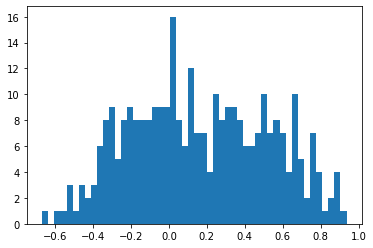

In [94]:
plt.hist(t2,bins=50)

In [115]:
t1 = np.array([a for a in mf.averaged_product_list(simdict,'SYNONYMS',objsubset1,"maha").values()])
t2 = np.array([a for a in mf.averaged_product_list(simdict,'NONE',objsubset1,"maha").values()])
t3 = np.array([a for a in mf.averaged_product_list(simdict,'ANTONYMS',objsubset1,"maha").values()])

(array([2., 0., 0., 0., 0., 0., 0., 0., 1., 0., 2., 0., 1., 1., 1., 1., 2.,
        3., 4., 0., 1., 1., 3., 2., 1., 0., 1., 1., 1., 1., 1., 3., 1., 4.,
        1., 0., 4., 2., 0., 3., 4., 1., 1., 1., 1., 1., 2., 3., 5., 1., 2.,
        2., 2., 1., 0., 0., 2., 1., 0., 0., 1., 2., 4., 0., 1., 2., 3., 1.,
        4., 1., 3., 1., 2., 0., 0., 2., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]),
 array([-0.57404485, -0.55987731, -0.54570978, -0.53154224, -0.5173747 ,
        -0.50320717, -0.48903963, -0.4748721 , -0.46070456, -0.44653702,
        -0.43236949, -0.41820195, -0.40403442, -0.38986688, -0.37569935,
        -0.36153181, -0.34736427, -0.33319674, -0.3190292 , -0.30486167,
        -0.29069413, -0.27652659, -0.26235906, -0.24819152, -0.23402399,
        -0.21985645, -0.20568892, -0.19152138, -0.17735384, -0.16318631,
        -0.14901877, -0.13485124, -0.1206837 , -0.10651616, -0.09234863,
        -0.07818109, -0.06401356, -0.04

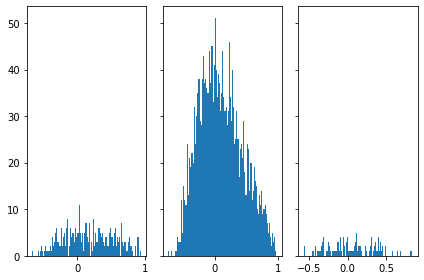

In [119]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, tight_layout=True)
ax1.hist(t1,bins=100)
ax2.hist(t2,bins=100)
ax3.hist(t3,bins=100)

(array([2., 0., 0., 0., 1., 2., 2., 2., 5., 4., 2., 5., 1., 2., 2., 4., 5.,
        1., 6., 3., 5., 2., 2., 5., 6., 4., 3., 0., 3., 0., 3., 4., 3., 4.,
        5., 4., 2., 2., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 2.]),
 array([-0.57404485, -0.54570978, -0.5173747 , -0.48903963, -0.46070456,
        -0.43236949, -0.40403442, -0.37569935, -0.34736427, -0.3190292 ,
        -0.29069413, -0.26235906, -0.23402399, -0.20568892, -0.17735384,
        -0.14901877, -0.1206837 , -0.09234863, -0.06401356, -0.03567849,
        -0.00734341,  0.02099166,  0.04932673,  0.0776618 ,  0.10599687,
         0.13433194,  0.16266702,  0.19100209,  0.21933716,  0.24767223,
         0.2760073 ,  0.30434237,  0.33267745,  0.36101252,  0.38934759,
         0.41768266,  0.44601773,  0.4743528 ,  0.50268788,  0.53102295,
         0.55935802,  0.58769309,  0.61602816,  0.64436323,  0.67269831,
         0.70103338,  0.72936845,  0.75770352,  0.78603859,  0.81437366,
         0.84270874]),
 <BarContainer object

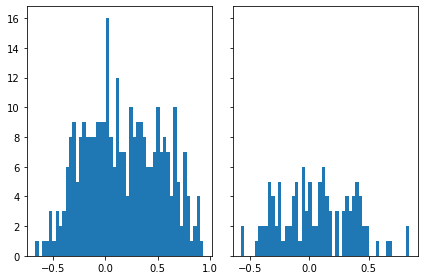

In [122]:
fig2, (ax1,ax3) = plt.subplots(1, 2, sharey=True, tight_layout=True)
ax1.hist(t1,bins=50)
ax3.hist(t3,bins=50)

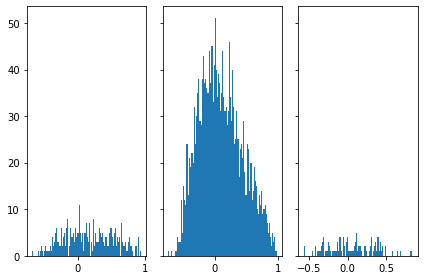

In [127]:
fig

In [8]:
[[mf.averaged_product(simdict,'ANTONYMS',a,"maha"),mf.averaged_product(simdict,'NONE',a,"maha"),mf.averaged_product(simdict,'SYNONYMS',a,"maha")] for a in file_list3]

[[[-0.004709029234531826, 0.23765827100673054],
  [0.07530421403074858, 0.3045261803382933],
  [0.14074076430139867, 0.3225358595093689]],
 [[0.00026681063163406203, 0.2319794192118812],
  [0.07722811971346014, 0.3050189142785644],
  [0.14532006576844866, 0.316807599730835]],
 [[0.01980587722531466, 0.2346753037001025],
  [0.08279848440909883, 0.3087987053013744],
  [0.15897832350896562, 0.31191798337098336]],
 [[0.0491890135982717, 0.3050848607307325],
  [0.08206922190486705, 0.34953375175453905],
  [0.13596856337480395, 0.364543323414541]]]